In [1]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")


# Loading the data
# Dataframe
path_df = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)
    
# features
path_features = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features.pickle"
with open(path_features, 'rb') as data:
    features = pickle.load(data)
    

# features_train
path_features_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/Users/mac/Desktop/DSS_ML/ToolsAbstrcts_4Classes_40/Tools-abstract/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [2]:
#Cross-Validation for Hyperparameter tuning

#see what hyperparameters the model we want to tune has
lr_0 = LogisticRegression(random_state = 8)
print('Parameters currently in use:\n')
pprint(lr_0.get_params())


Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [3]:
#Grid Search Cross Validation
# defining the grid 
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Create a base model
lrc = LogisticRegression(random_state=8)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=8,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)


Fitting 8 folds for each of 80 candidates, totalling 640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:    5.1s finished


GridSearchCV(cv=8, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                               0.7000000000000001, 0.8, 0.9, 1.0],
                         'class_weight': ['balanced', None],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},

In [4]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 0.9, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}

The mean accuracy of a model with these hyperparameters is:
0.75


In [5]:
#saving the model in best_lvc

best_lrc = grid_search.best_estimator_
best_lrc

LogisticRegression(C=0.9, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

Training Accuracy: 0.54 (+/- 0.24)
Test Accuracy: 0.45 (+/- 0.28)
Training Accuracy: 0.59 (+/- 0.04)
Test Accuracy: 0.43 (+/- 0.23)
Training Accuracy: 0.55 (+/- 0.17)
Test Accuracy: 0.48 (+/- 0.27)
Training Accuracy: 0.69 (+/- 0.14)
Test Accuracy: 0.48 (+/- 0.36)
####################################################################################################
Accuracy on training set: 0.69 (+/- 0.14)


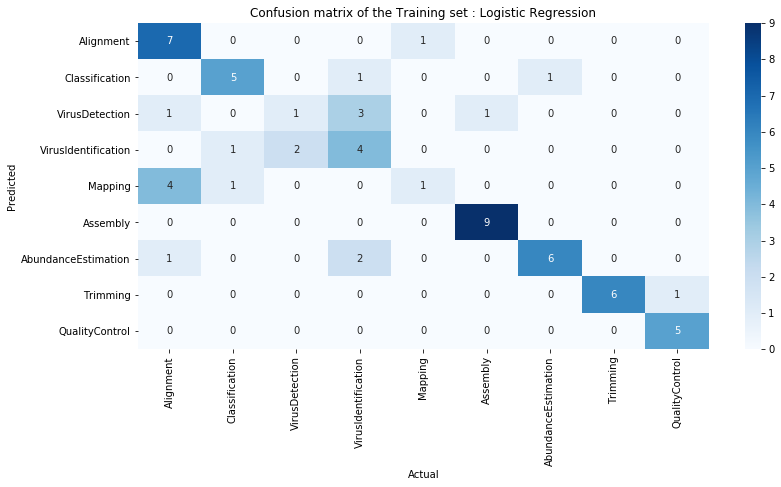

Accuracy on test set: 0.48 (+/- 0.36)


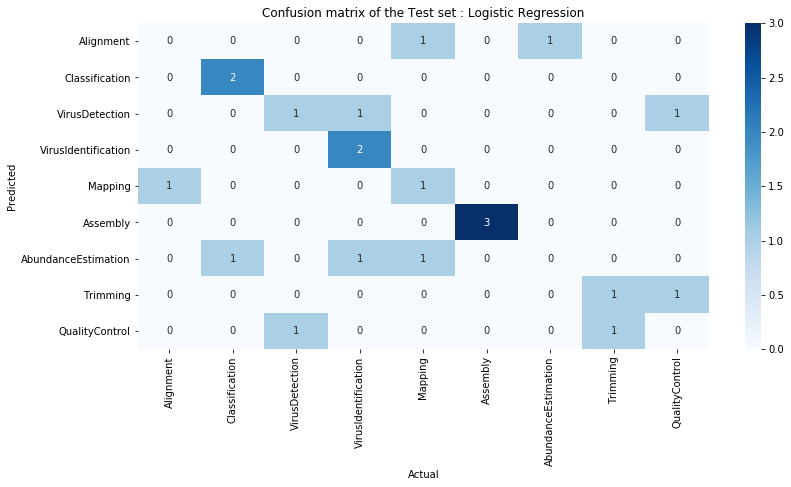

Accuracy on wole data set: 0.59 (+/- 0.07)


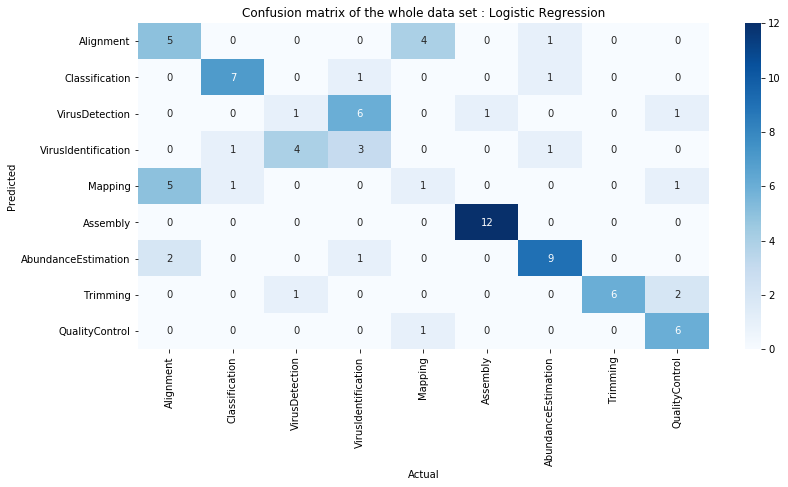

In [6]:
# Stratified cross validation

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

labels = df['Category_Code']



# stratified 4 fold crosss validation

skf = StratifiedKFold(n_splits=4, random_state=2, shuffle=True)
skf.get_n_splits(features)
for train_index, test_index in skf.split(features, labels):

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    lrc_fit = best_lrc.fit(X_train, y_train)
    lrc_pred = best_lrc.predict(X_test)
    #confidence interval training set
    scores = cross_val_score(lrc_fit, X_train, y_train, cv=3, scoring='accuracy')
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

     #confidence interval test set
    scores = cross_val_score(lrc_fit, X_test, y_test, cv=3, scoring='accuracy')
    print("Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


# Training set performance
#confidence interval 
scores = cross_val_score(lrc_fit, X_train, y_train, cv=3, scoring='accuracy')
print("Accuracy on training set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(lrc_fit, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Training set : Logistic Regression')
plt.show()


# Test set performance
#confidence interval 
scores = cross_val_score(lrc_fit, X_test, y_test, cv=3, scoring='accuracy')
print("Accuracy on test set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(lrc_fit, X_test, y_test, cv=3)
conf_mat = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the Test set : Logistic Regression')
plt.show()


# whole data set performance
#confidence interval 
scores = cross_val_score(lrc_fit, features, labels, cv=3, scoring='accuracy')
print("Accuracy on wole data set: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# confusion matrix
y_pred = cross_val_predict(lrc_fit, features, labels, cv=3)
conf_mat = confusion_matrix(labels, y_pred)
# plot the confusion matrix
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = conf_mat
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix of the whole data set : Logistic Regression')
plt.show()






In [7]:
# checking if the hyperparameter tuning process has returned a better model
# base model
base_model = LogisticRegression(random_state = 8)
scores_base = cross_val_score(base_model, X_train, y_train, cv=3, scoring='accuracy')
print("base model accuracy: %0.2f (+/- %0.2f)" % (scores_base.mean(), scores_base.std() * 2))
# tuned model
scores_tuned = cross_val_score(lrc_fit, X_train, y_train, cv=3, scoring='accuracy')
print("tuned model accuracy: %0.2f (+/- %0.2f)" % (scores_tuned.mean(), scores_tuned.std() * 2))


base model accuracy: 0.60 (+/- 0.18)
tuned model accuracy: 0.69 (+/- 0.14)
